Measure the decay time of musical resonances

/var/folders/lg/9twk84311llgwk38_815qyv80000gp/T/ipykernel_1429/3705852661.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(audio_file_path)


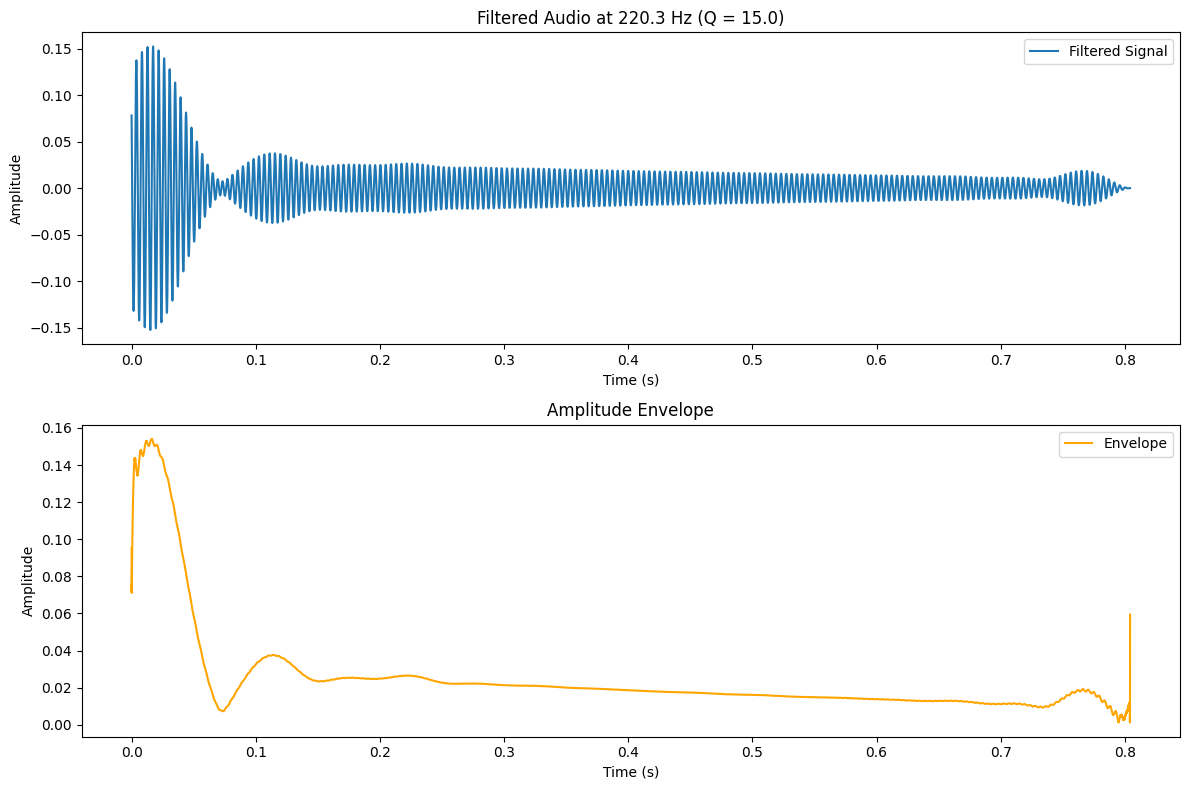

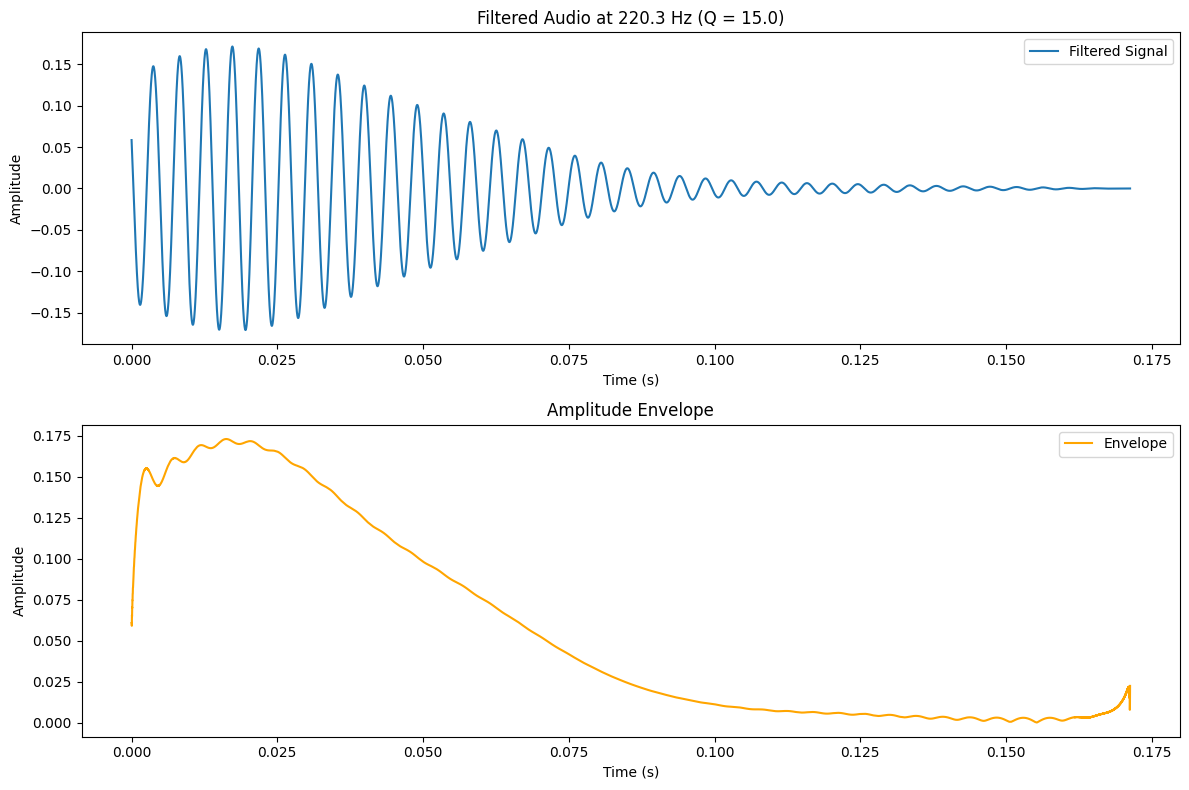

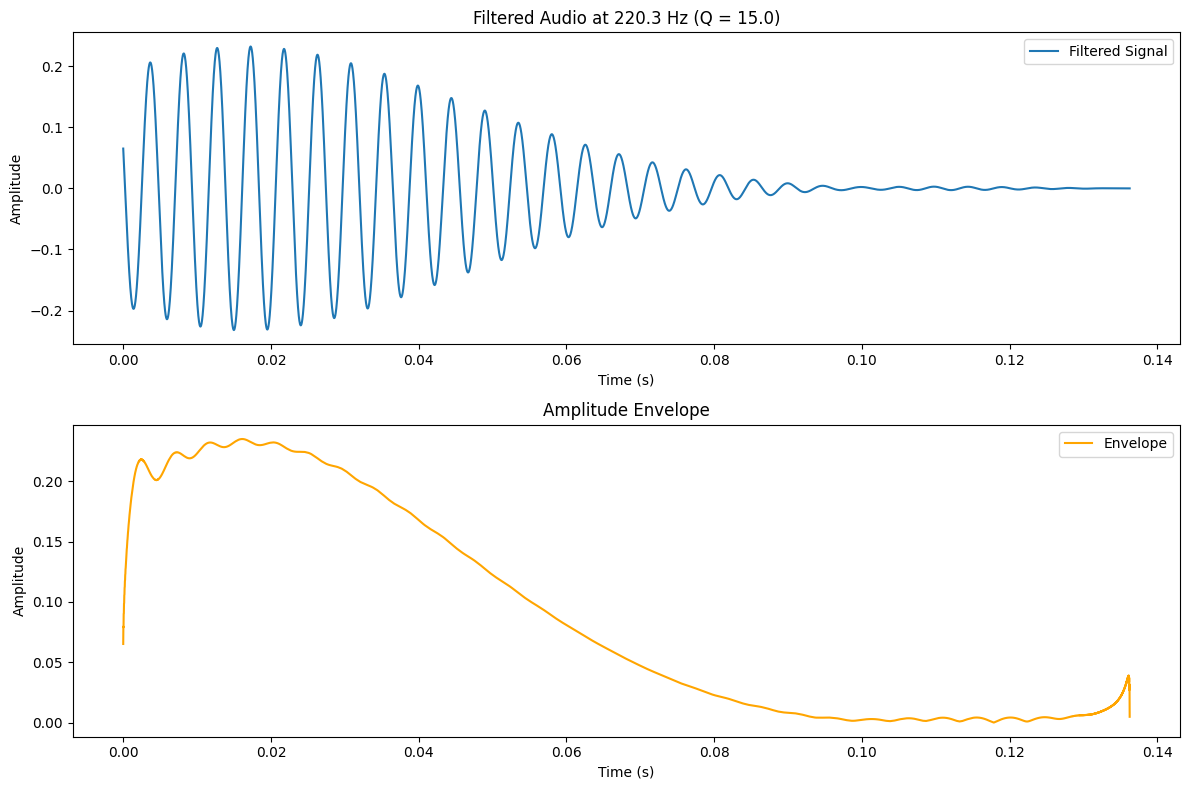

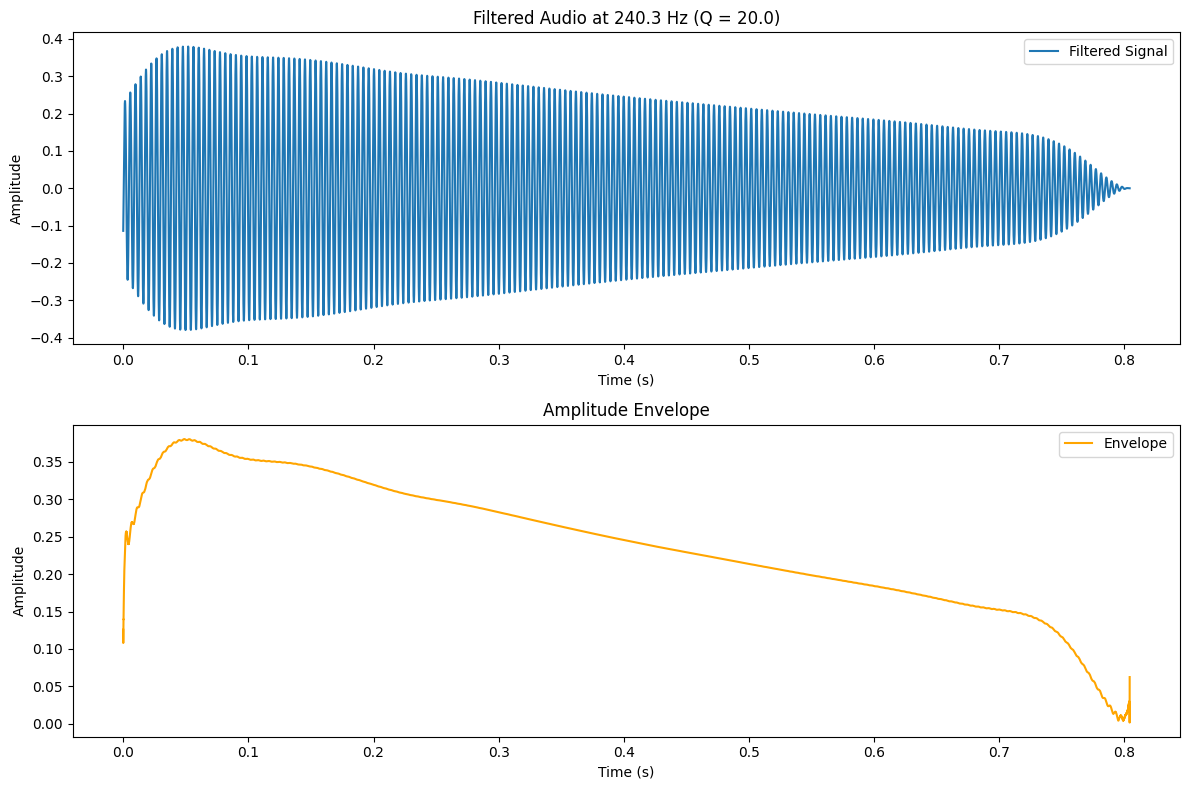

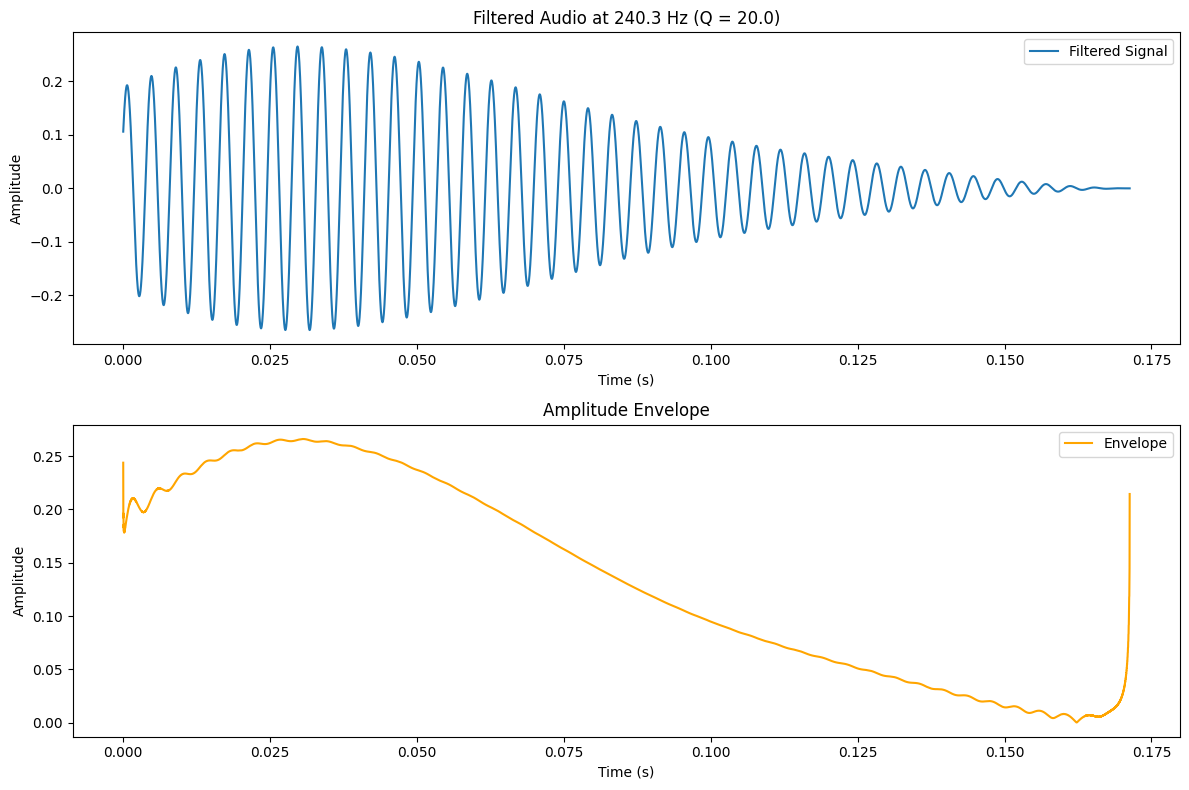

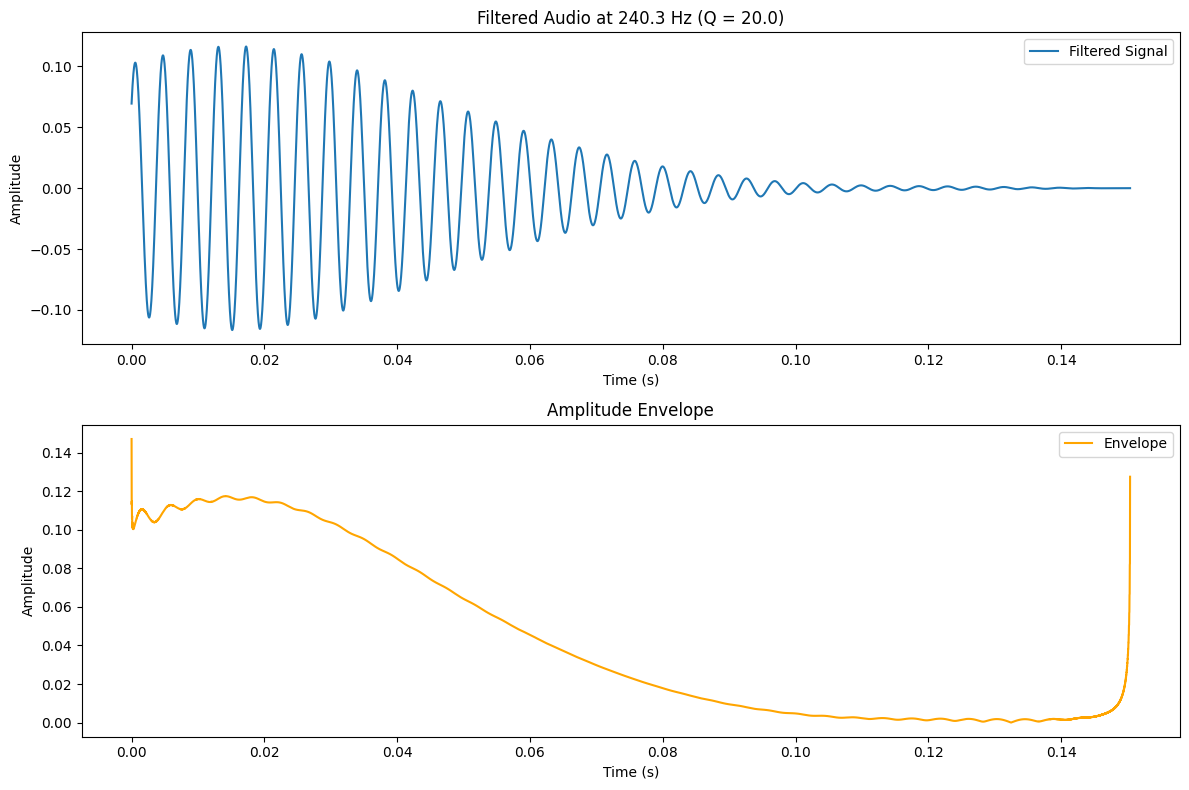

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, filtfilt, hilbert

def measure_resonance_decay(audio_file_path, resonance_freq, Q):
    fs, data = wavfile.read(audio_file_path)
    if data.dtype != np.float32 and data.dtype != np.float64:
        data = data / np.max(np.abs(data))
    
    # Design bandpass Butterworth filter.
    # The bandwidth is defined by f0/Q, so the low and high cutoff frequencies are:
    bw = resonance_freq / Q
    low_cut = resonance_freq - bw / 2
    high_cut = resonance_freq + bw / 2
    
    nyq = fs / 2
    low_cut = max(low_cut, 0.001)  # avoid zero frequency
    high_cut = min(high_cut, nyq - 0.001)
    # Normalize frequencies for digital filter design
    low = low_cut / nyq
    high = high_cut / nyq
    # 2nd order bandpass filter design
    b, a = butter(N=2, Wn=[low, high], btype='band')
    # Filter the audio signal using zero-phase filtering
    filtered = filtfilt(b, a, data)
    # Compute the amplitude envelope using the Hilbert transform
    analytic_signal = hilbert(filtered)
    envelope = np.abs(analytic_signal)
    
    t = np.arange(len(data)) / fs
    plt.figure(figsize=(12, 8))
    
    # Plot filtered signal
    plt.subplot(2, 1, 1)
    plt.plot(t, filtered, label='Filtered Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Filtered Audio at {:.1f} Hz (Q = {:.1f})'.format(resonance_freq, Q))
    plt.legend()
    
    # Plot envelope
    plt.subplot(2, 1, 2)
    plt.plot(t, envelope, color='orange', label='Envelope')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Amplitude Envelope')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

measure_resonance_decay("hammer_responses/bp_220-3_20_g2-3.wav", resonance_freq=220.3, Q=15)
measure_resonance_decay("hammer_responses/bp_combi.wav", resonance_freq=220.3, Q=15)
measure_resonance_decay("hammer_responses/Hammer_14_02.wav", resonance_freq=220.3, Q=15)
measure_resonance_decay("hammer_responses/bp_220-3_20_g2-3.wav", resonance_freq=240.3, Q=20)
measure_resonance_decay("hammer_responses/bp_combi.wav", resonance_freq=240.3, Q=20)
measure_resonance_decay("hammer_responses/Hammer_14_01.wav", resonance_freq=240.3, Q=20)
